<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Data-Mining-Python/blob/main/20261_1910_05_RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [ ]:
#Cargar el dataset Boston Housing
df = pd.read_csv("https://raw.githubusercontent.com/omarmendoza564/datos/main/datos/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


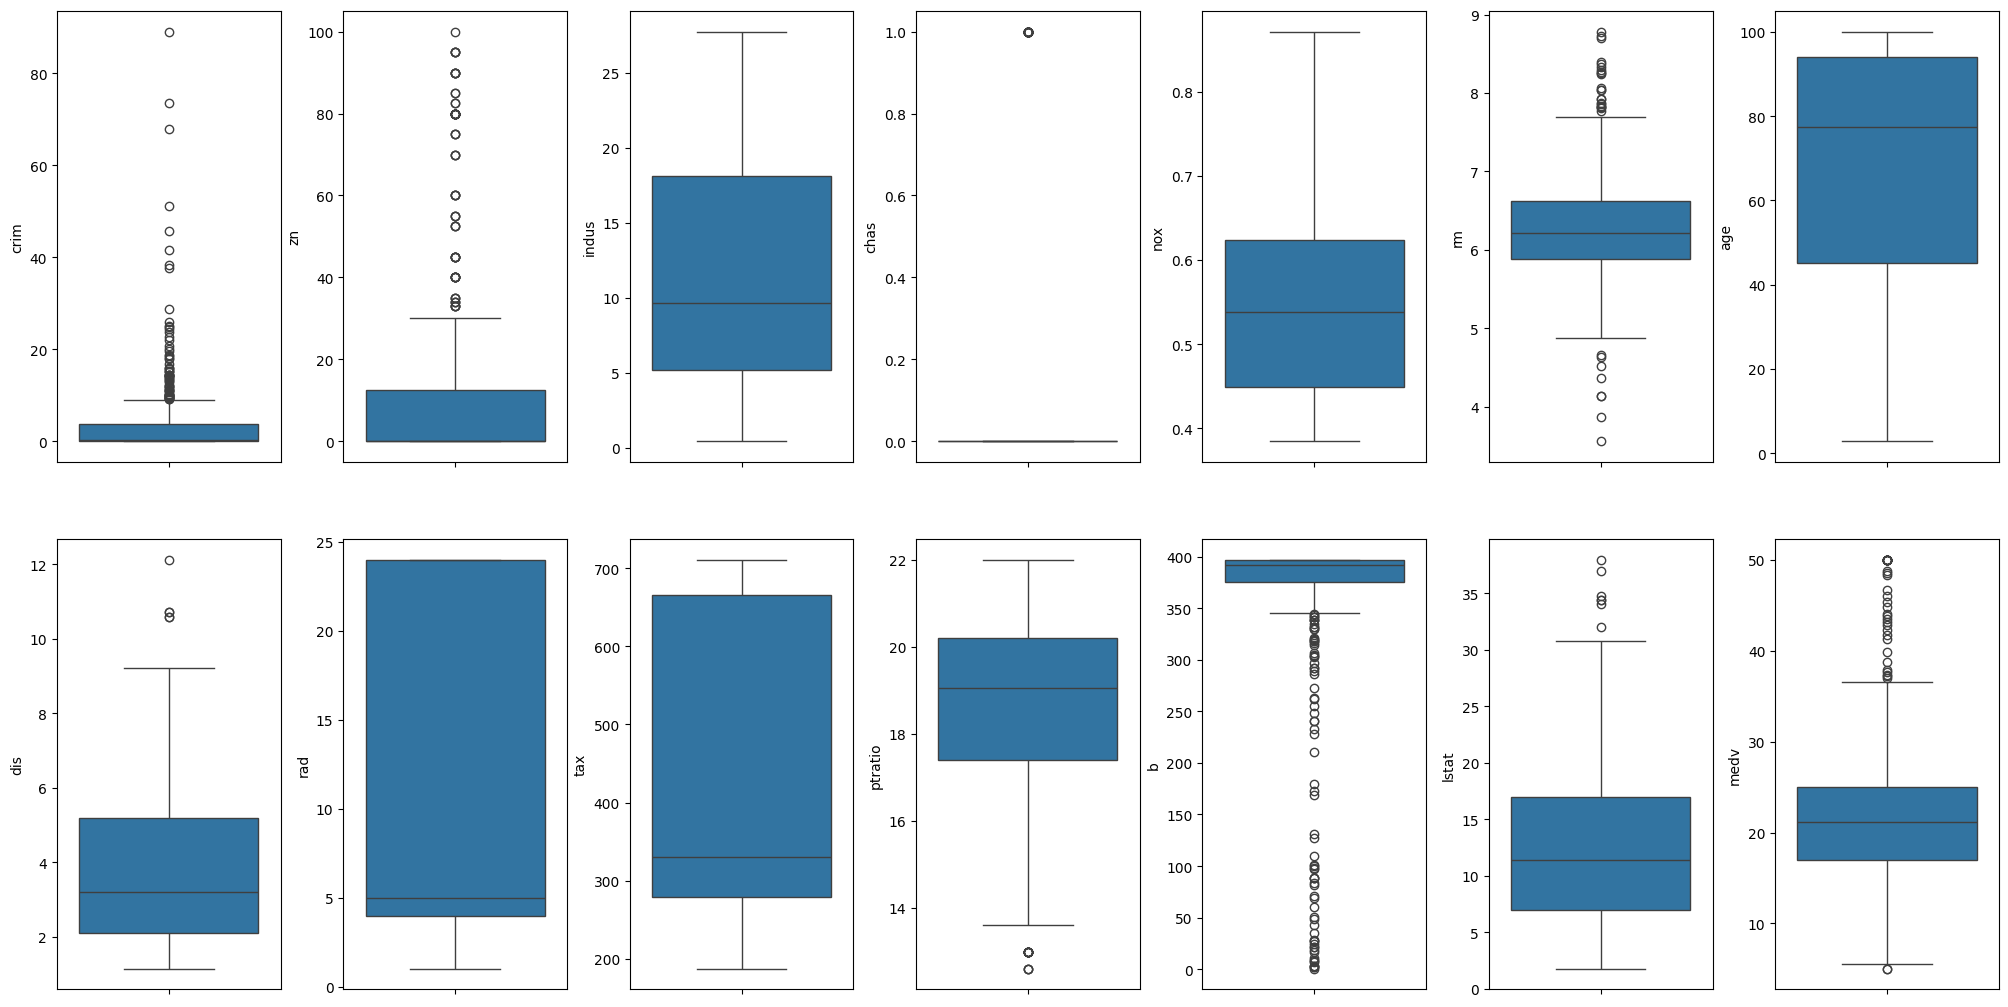

In [ ]:

#Boxplot
#Columnas como CRIM, ZN, RM, B parecen tener valores atípicos.
#Veamos el porcentaje de valores atípicos en cada columna.

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Correlacion lineal de RM y MEDV

cc, p_value = pearsonr(df['rm'], df['medv'])
print("Coeficiente de correlación de Pearson:", cc)
print("Valor p:", p_value)
#Aunque no hay una correlación alta entre variables pero siempre influye en la misma proporción

Coeficiente de correlación de Pearson: 0.6953599470715395
Valor p: 2.487228871007625e-74



* Hipótesis nula: establece que no existe una relación entre dos variables
* El valor P muy pequeño indica que es extremadamente improbable que la correlación observada haya ocurrido por casualidad
* El valor p (2.487228871007625e-74) indica que existe una relación estadísticamente significativa entre el número de habitaciones y el precio de la vivienda

In [ ]:
#Correlacion de medv contra todas las variables

for c in df.columns:
    cc, p_value = pearsonr(df[c], df['medv'])
    print("*"* 40)
    print("Variable:", c)
    print("Coeficiente de correlación de Pearson:", cc)
    print("Valor p:", p_value)

****************************************
Variable: crim
Coeficiente de correlación de Pearson: -0.38830460858681154
Valor p: 1.1739870821943684e-19
****************************************
Variable: zn
Coeficiente de correlación de Pearson: 0.360445342450543
Valor p: 5.713584153081037e-17
****************************************
Variable: indus
Coeficiente de correlación de Pearson: -0.4837251600283729
Valor p: 4.90025998175246e-31
****************************************
Variable: chas
Coeficiente de correlación de Pearson: 0.1752601771902984
Valor p: 7.390623170519845e-05
****************************************
Variable: nox
Coeficiente de correlación de Pearson: -0.4273207723732826
Valor p: 7.065041586253448e-24
****************************************
Variable: rm
Coeficiente de correlación de Pearson: 0.6953599470715395
Valor p: 2.487228871007625e-74
****************************************
Variable: age
Coeficiente de correlación de Pearson: -0.3769545650045963
Valor p: 1.569982

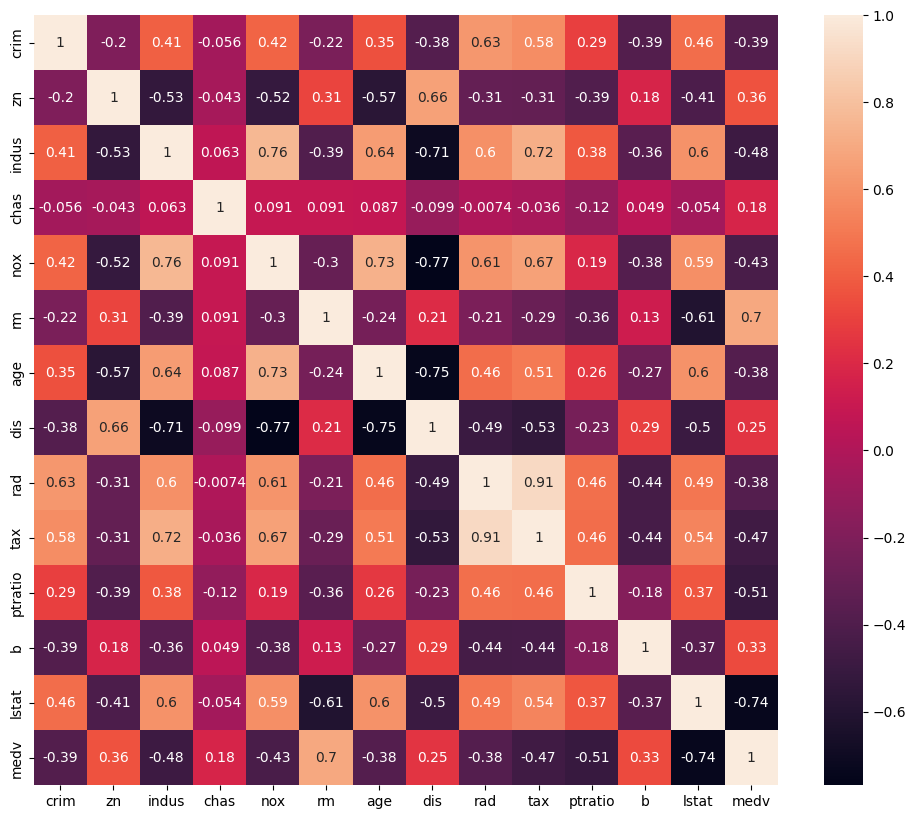

In [ ]:
# Matriz de correlacion

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

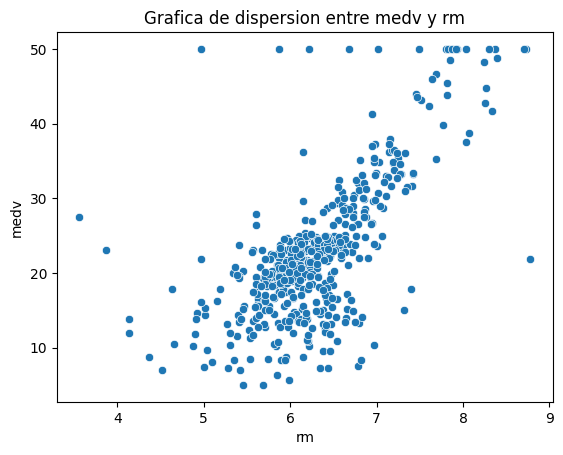

In [ ]:
# Grafica de dispersion entre medv y rm
sns.scatterplot(x='rm', y='medv', data=df)
plt.title("Grafica de dispersion entre medv y rm")
plt.xlabel("rm")
plt.ylabel("medv")
plt.show()

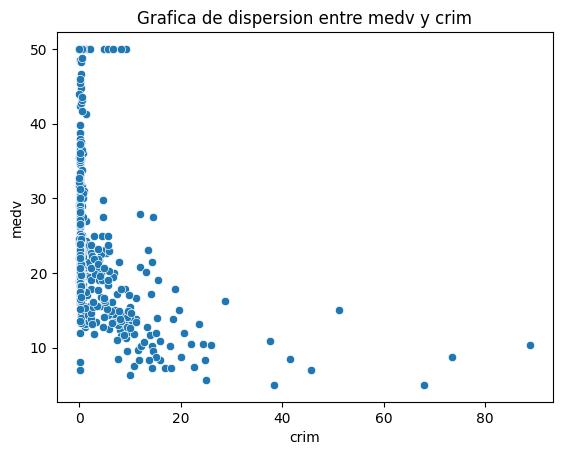

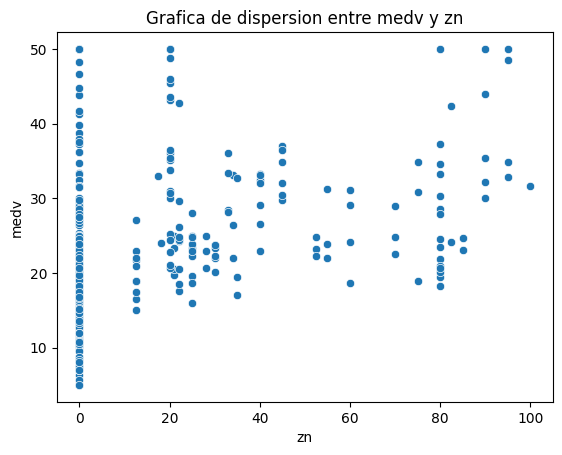

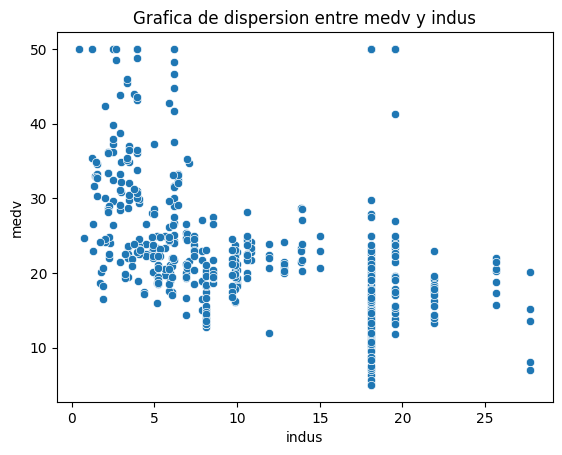

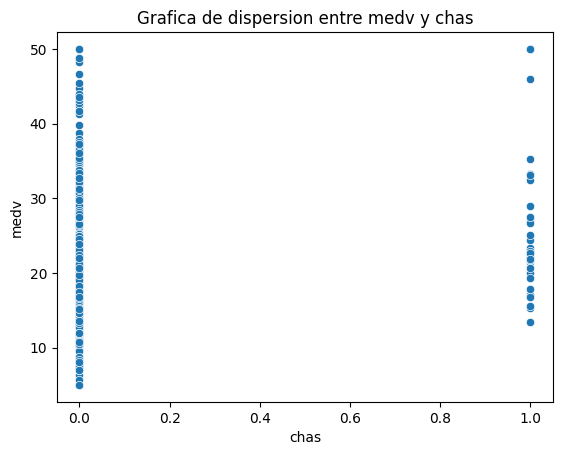

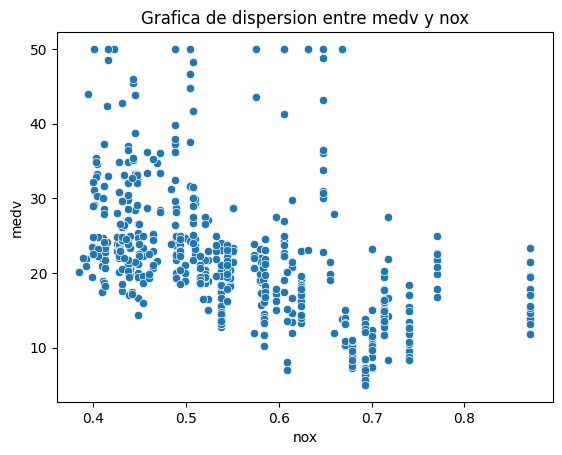

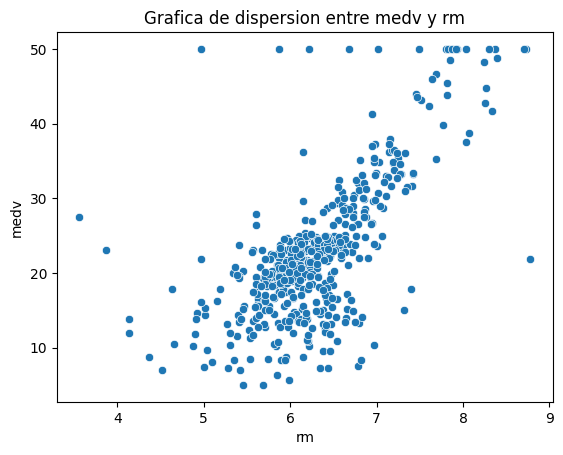

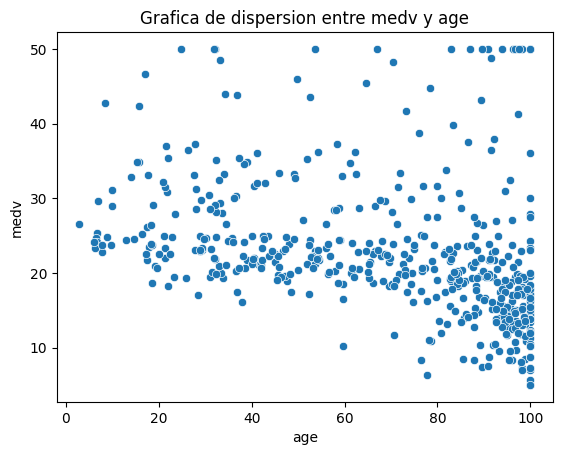

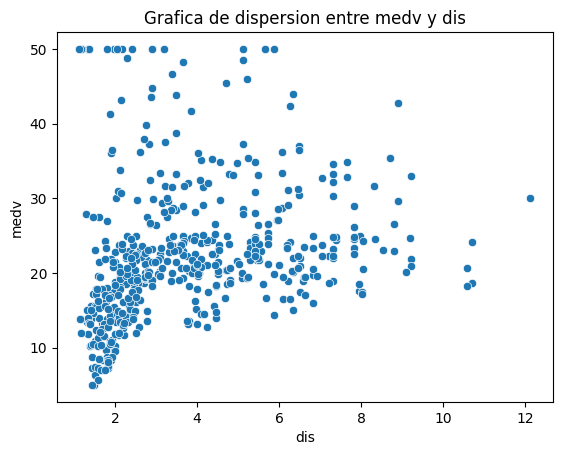

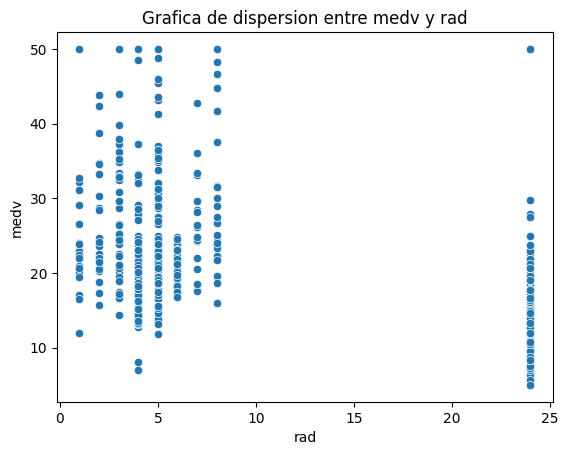

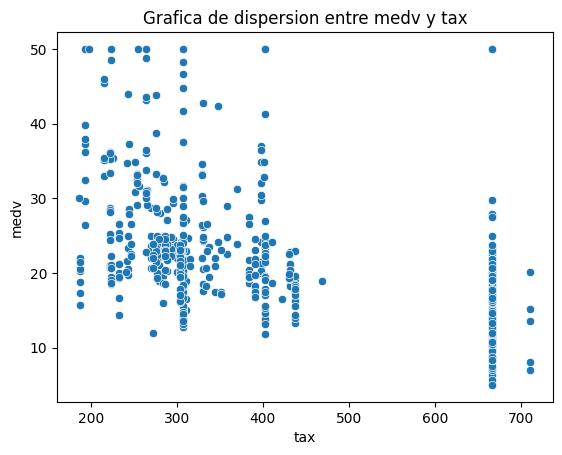

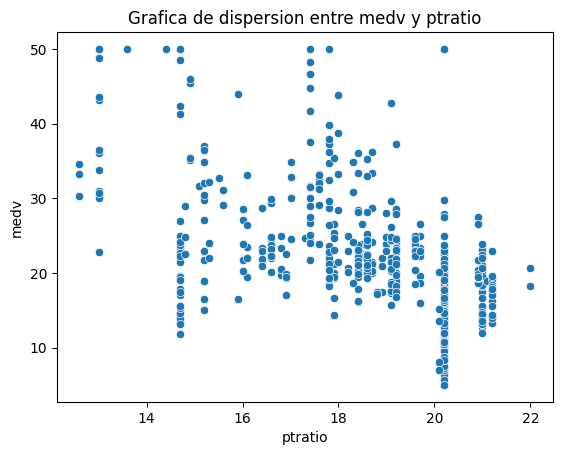

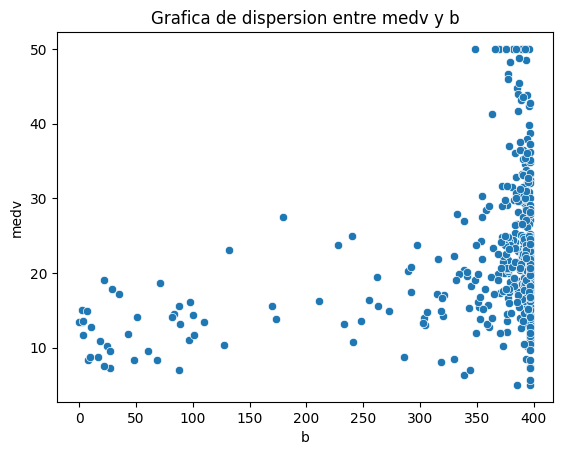

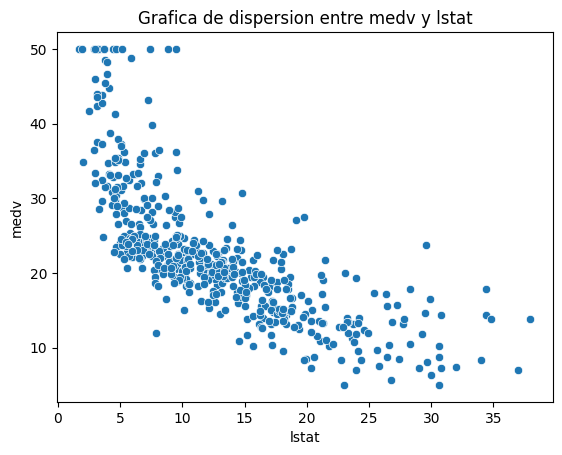

In [ ]:
#Grafica de dispersion de medv contra las variables del df

for c in df.columns:
    if c != 'medv':
        sns.scatterplot(x=c, y='medv', data=df)
        plt.title(f"Grafica de dispersion entre medv y {c}")
        plt.xlabel(c)
        plt.ylabel("medv")
        plt.show()

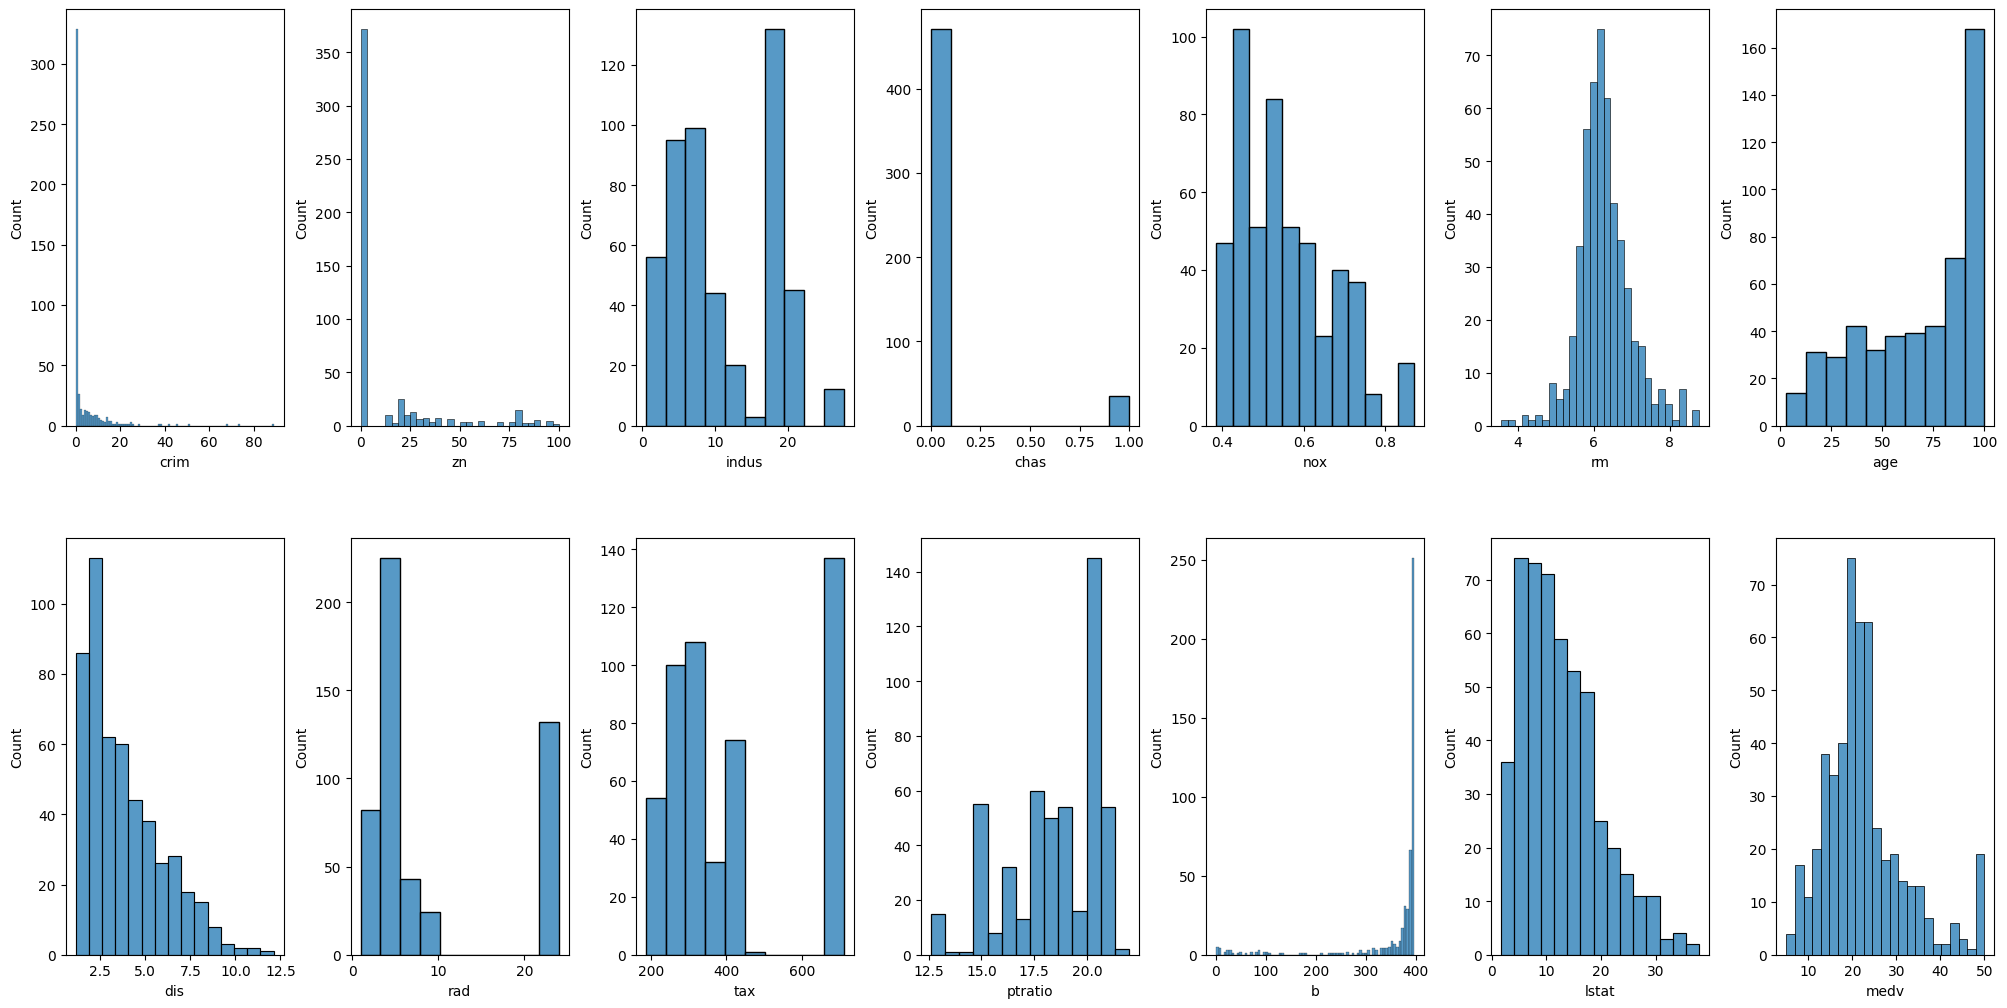

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/tmp/ipython-input-2276697692.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipython-input-2276697692.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipython-input-2276697692.py:9: UserWarning: 

`distplot` is a deprecated function and will 

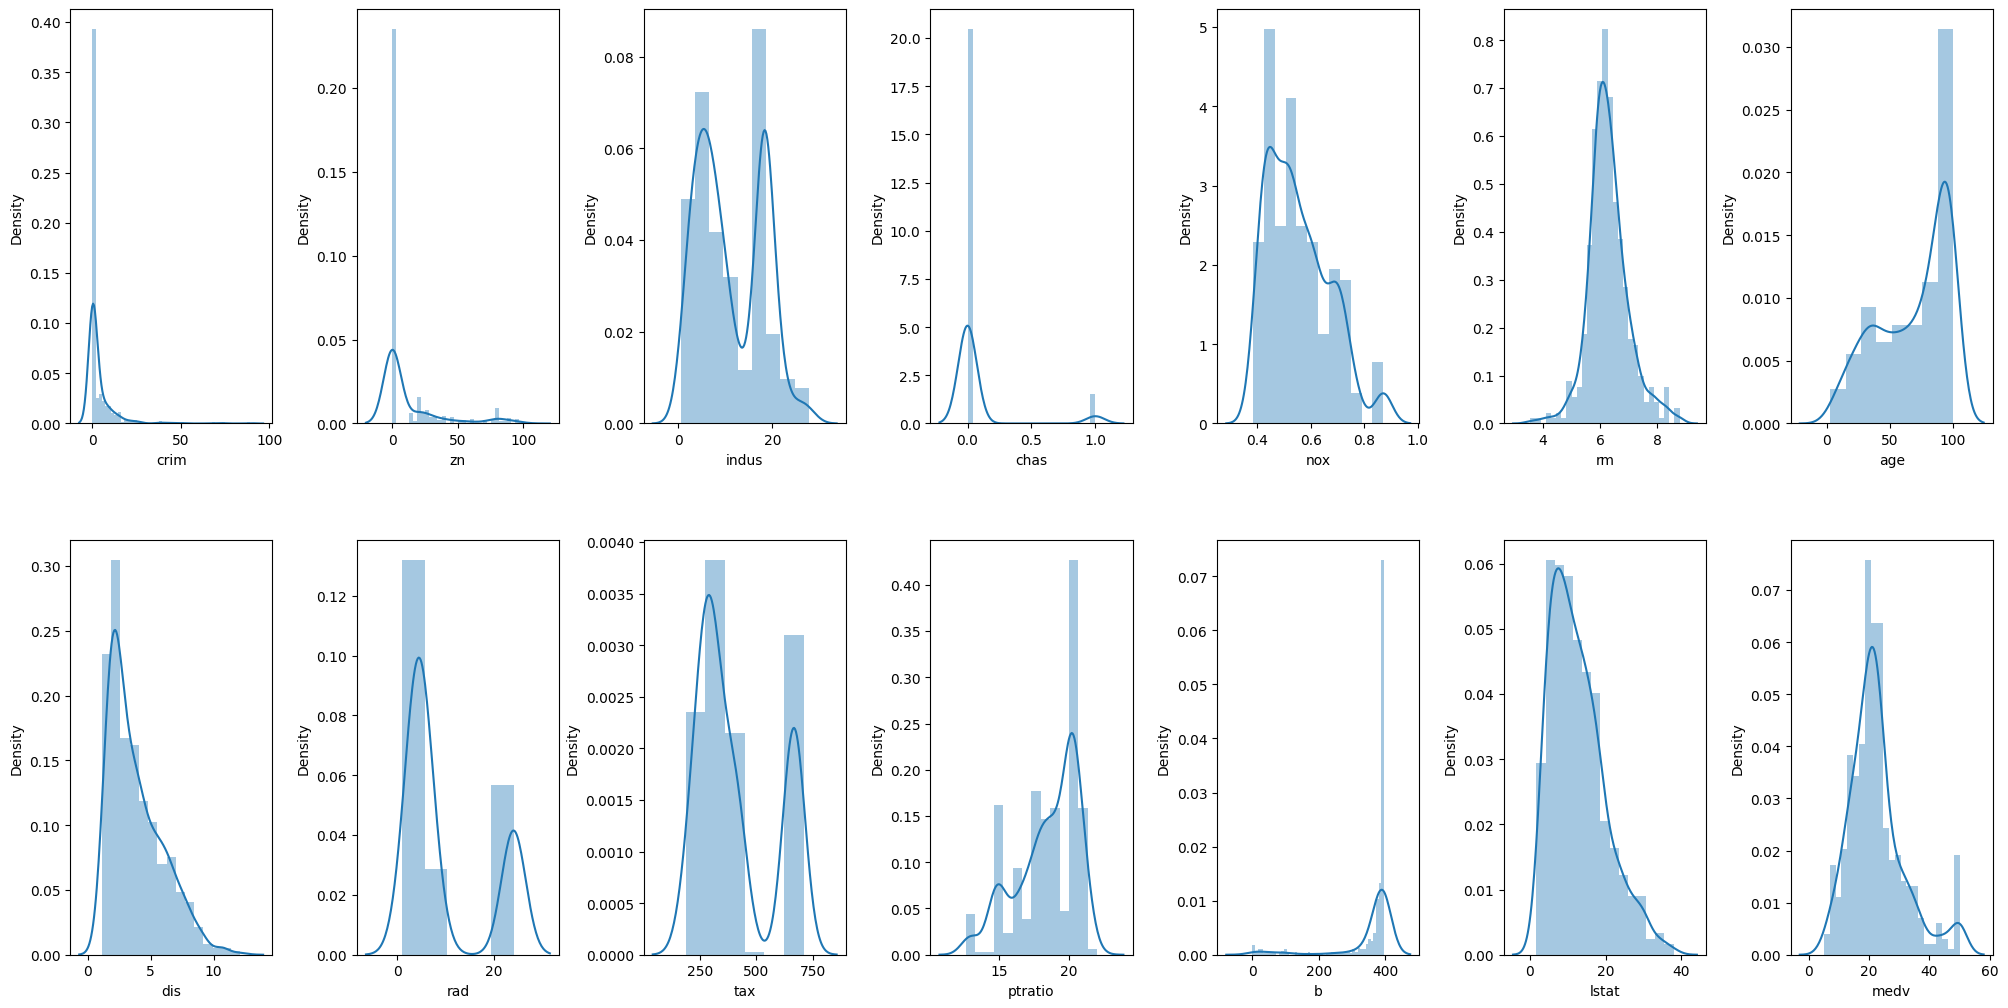

In [ ]:
# Gráfico de la distribución de la variable objetivo MEDV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Dividir los datos en train y test
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')

In [ ]:
print (X_train.shape)
print (X_test.shape)

(404, 14)
(102, 14)


In [ ]:

# Crear una copia temporal de X_train para la eliminación hacia atrás
X_selected = X_train.copy()

# Umbral de significancia (típicamente 0.05)
significance_level = 0.05

# Proceso iterativo de eliminación hacia atrás
while True:
    # Se ajusta un modelo de regresión lineal OLS (Ordinary Least Squares)
    #Busca una relación lineal entre una variable dependiente y y una o más variables independientes X.
    # Minimiza el error cuadrático total
    model = sm.OLS(y_train, X_selected).fit()
    p_values = model.pvalues
    max_pval = p_values.max()
    if max_pval > significance_level:
        excluded_variable = p_values.idxmax()
        print(f"Eliminando: {excluded_variable} (p={max_pval:.4f})")
        X_selected = X_selected.drop(columns=[excluded_variable])
    else:
        break

# Resultado final
print("\nResumen del modelo final:")
print(model.summary())

Eliminando: age (p=0.6658)
Eliminando: indus (p=0.5570)
Eliminando: zn (p=0.0614)

Resumen del modelo final:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          3.85e-111
Time:                        18:08:51   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
#Validar la medida de los residuos

residual = model.resid
fitted_values = model.fittedvalues
residual.mean

<bound method Series.mean of 477    0.987085
15     0.374136
332   -3.597561
423    1.289399
19    -0.213547
         ...   
106    2.227006
270   -0.423421
348   -1.235537
435    0.449414
102   -0.694401
Length: 404, dtype: float64>

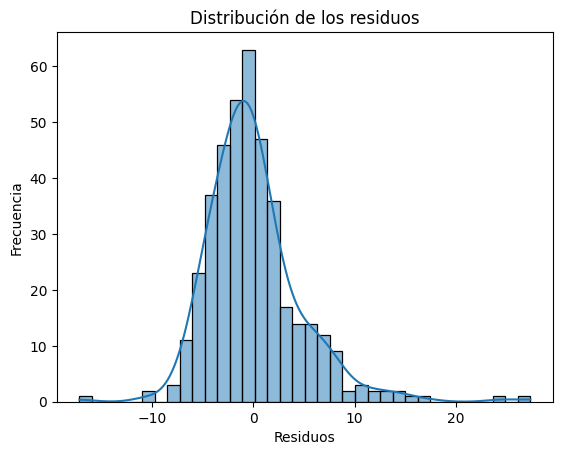

In [ ]:
#Graficar los residuos

sns.histplot(residual, kde=True)

plt.title("Distribución de los residuos")

plt.xlabel("Residuos")

plt.ylabel("Frecuencia")

plt.show()

In [ ]:
#Funciones para evaluar el modelo

# Función para calcular el R cuadrado ajustado
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# función para calcular MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Función para calcular diferentes métricas para comprobar el rendimiento de un modelo de regresión.
def model_performance_regression(model, predictors, target):
    """
    Función para calcular diferentes métricas para comprobar el rendimiento del modelo de regresión.

    Modelo: regresor
    Predictores: variables independientes
    Objetivo: variable dependiente
    """

    # predecir utilizando las variables independientes
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # tRMSE
    mae = mean_absolute_error(target, pred)  # MAE
    mape = mape_score(target, pred)  # MAPE

    # creando un marco de datos de métricas
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Rendimiento del modelo en datos de prueba y entrenamiento
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Predicción en muestra
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Predicción sobre datos de prueba
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
# Select the columns for the test set that were kept after backward elimination
# Ensure the columns in X_test_selected match the columns in X_selected
X_test_selected = X_test[X_selected.columns]

# Evaluate the model performance on the test set
lr_test_performance = model_performance_regression(model, X_test_selected, y_test)

# Display the test performance metrics
print("Test set performance:")
display(lr_test_performance)

Test set performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.049774,3.265642,0.652272,0.609772,17.105606


RMSE 5.05 En promedio las predicciones se desvian +-5.05 unidades

MAE 3.36 El error promedio absoluto es de 3.27 unidades

R-scuared 0.65 El modelo explica aproximadamente el 65% de la variabilidad de los precios promedio

Adj. R-squared 0.609 Valor ajustado por el numero de variables, capacidad explicativa mas realista

MAPE 17.10% El modelo tiene un error porcentual del 17.1 en sus predicciones

In [ ]:
#Ver los parámetros del modelo
model.params

,0
const,30.931097
crim,-0.108568
chas,2.875249
nox,-17.953929
rm,4.463746
dis,-1.234960
rad,0.238116
tax,-0.007795
ptratio,-1.012242
b,0.012274


In [ ]:
#crear el modelo de regresion

lr = LinearRegression()

lr.fit(X_selected, y_train)

#Predecir los valores

y_pred = lr.predict(X_test_selected)

In [ ]:
X_selected_pred = X_selected.copy()

X_selected_pred['medv'] = y_train

X_selected_pred['pred'] = lr.predict(X_selected)

X_selected_pred['error'] = X_selected_pred['medv'] - X_selected_pred['pred']

X_selected_pred

,const,crim,chas,nox,rm,dis,rad,tax,ptratio,b,lstat,medv,pred,error
477,1.0,15.02340,0,0.6140,5.304,2.1007,24,666,20.2,349.48,24.91,12.0,11.012915,0.987085
15,1.0,0.62739,0,0.5380,5.834,4.4986,4,307,21.0,395.62,8.47,19.9,19.525864,0.374136
332,1.0,0.03466,0,0.4379,6.031,6.6407,1,304,16.9,362.25,7.83,19.4,22.997561,-3.597561
423,1.0,7.05042,0,0.6140,6.103,2.0218,24,666,20.2,2.52,23.29,13.4,12.110601,1.289399
19,1.0,0.72580,0,0.5380,5.727,3.7965,4,307,21.0,390.95,11.28,18.2,18.413547,-0.213547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.17120,0,0.5200,5.836,2.2110,5,384,20.9,395.67,18.66,19.5,17.272994,2.227006
270,1.0,0.29916,0,0.4640,5.856,4.4290,3,223,18.6,388.65,13.00,21.1,21.523421,-0.423421
348,1.0,0.01501,0,0.4350,6.635,8.3440,4,280,17.0,390.94,5.99,24.5,25.735537,-1.235537
435,1.0,11.16040,0,0.7400,6.629,2.1247,24,666,20.2,109.85,23.27,13.4,12.950586,0.449414


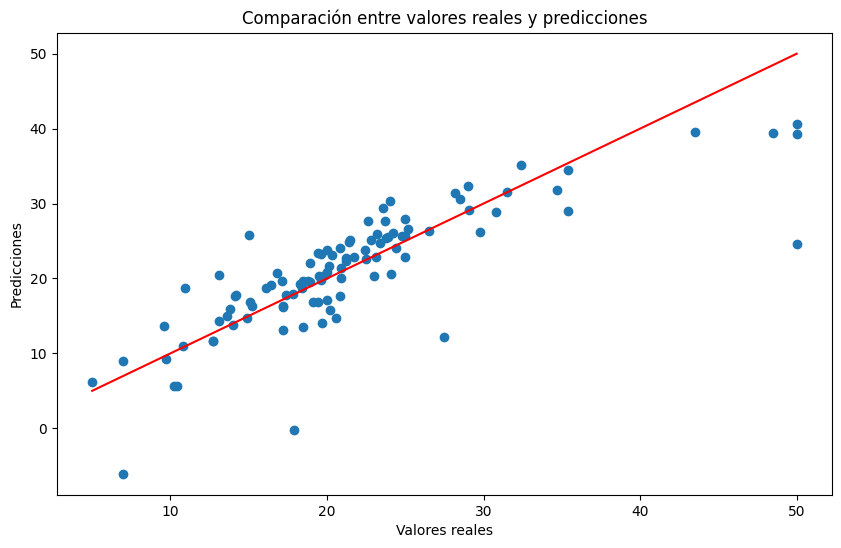

In [ ]:
#Graficar predicciones vs valores reales

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred)

plt.xlabel("Valores reales")

plt.ylabel("Predicciones")

plt.title("Comparación entre valores reales y predicciones")

#Linea de identidad

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')

plt.show()

In [ ]:
# Evaluate the Linear Regression model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 25.50
Root Mean Squared Error (RMSE): 5.05
Mean Absolute Error (MAE): 3.27
R-squared (R2): 0.65
